<a href="https://colab.research.google.com/github/tsabitanajma/Stunting-Data-Analysis/blob/main/REVISI_PROJECT_DATMIN_DATA_STUNTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Data Mining Stunting

**Kelompok 10 Data Mining**
1. Salsabila Khorun Nisa : 24050122120039
2. Tsabita Bahiratu Najma : 24050122130060
3. Nasywa Agiyan Nisa : 24050122130073
4. Luna Citra Alifa : 24050122130080

##TENTANG DATASET

Dataset ini mencakup atribut demografis dan terkait kesehatan yang bertujuan untuk memprediksi secara diagnostik apakah seorang pasien menderita stunting berdasarkan pengukuran diagnostik. Dataset mencakup informasi tentang Gender, Age, Birth Weight, Birth Length, Body Weight, Body Length, Breastfeeding, dan Stunting. Dataset ini memberikan data faktor-faktor yang berkontribusi pada Stunting serta memfasilitasi pengembangan model prediktif untuk penilaian risiko dan strategi pencegahan.

*   Stunting: Kondisi gagal tumbuh pada anak balita akibat kekurangan gizi kronis terutama dalam 1000 Hari Pertama Kehidupan (HPK).
*   Gender: Jenis Kelamin
*   Age: Usia
*   Birth Weight: Berat badan anak saat lahir.
*   Birth Length: Panjang badan anak saat lahir
*   Body Weight: Berat badan anak saat diukur
*   Body Length: Panjang badan anak saat diukur
*   Breastfeeding: ASI eksklusif yang diberikan kepada anak 6 bulan pertama

## Impor Data

In [ ]:
# Import pustaka yang diperlukan
import pandas as pd  # Untuk manipulasi data dalam bentuk DataFrame
import numpy as np  # Untuk operasi numerik dan array
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data yang lebih menarik

# Import library untuk preprocessing data
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Untuk normalisasi dan standarisasi data
from sklearn.preprocessing import LabelEncoder  # Untuk mengubah data kategori menjadi numerik
from sklearn.metrics import confusion_matrix

# Import algoritma machine learning
from sklearn.tree import DecisionTreeClassifier  # Model Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Model Random Forest
from sklearn.neighbors import KNeighborsClassifier  # Model K-Nearest Neighbors (KNN)
from sklearn.svm import SVC  # Model Support Vector Machine (SVM)
from sklearn.naive_bayes import GaussianNB  # Model Naive Bayes

# Import library untuk membagi data menjadi training dan testing
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi data latih dan data uji

# Import metrik evaluasi model
from sklearn.metrics import (
    accuracy_score,  # Mengukur akurasi model
    classification_report,  # Laporan metrik klasifikasi (precision, recall, F1-score)
    confusion_matrix,  # Membuat matriks kebingungan (confusion matrix)
    precision_score,  # Mengukur presisi model
    recall_score,  # Mengukur recall model
    f1_score,  # Mengukur F1-score model
    ConfusionMatrixDisplay  # Untuk menampilkan confusion matrix secara visual
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import os
os.chdir('/content/drive/MyDrive/')

In [ ]:
df = pd.read_csv("stunting.csv", sep = ";")

In [ ]:
df.sample(10)

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
6224,Female,15,2.8,49,7.1,72.2,No,Yes
5257,Female,10,3.0,49,8.0,92.7,No,Yes
2930,Male,16,2.9,48,2.9,68.3,No,No
3774,Male,16,2.3,49,6.4,72.2,No,Yes
5218,Female,37,2.8,49,7.1,92.7,No,Yes
9432,Female,12,3.0,49,7.7,92.7,No,Yes
8966,Female,9,2.0,49,7.7,76.0,No,Yes
2116,Female,12,2.0,49,7.2,65.0,No,Yes
7046,Male,11,2.9,49,8.5,71.0,No,Yes
260,Male,11,3.1,49,7.7,72.2,No,Yes


## Eksplorasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


### Proporsi Kelas

Stunting
Yes    0.7955
No     0.2045
Name: proportion, dtype: float64


<ipython-input-42-c971689b142c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stunting', data=df, palette='hls')


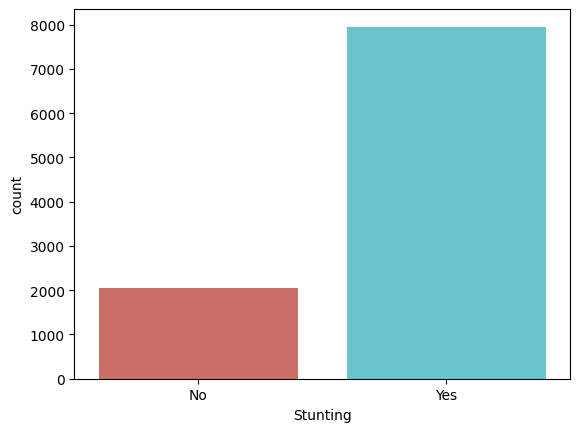

In [ ]:
print(df.Stunting.value_counts(normalize=True))
sns.countplot(x='Stunting', data=df, palette='hls')
plt.show()


**Proporsi Kelas**
-   Pada data Stunting ditemukan bahwa proporsi kelas tidak seimbang.

### Visualisasi Data

####Histogram Variabel Numerik

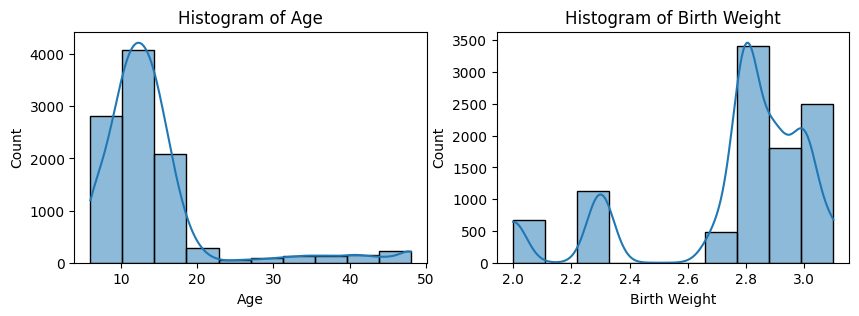

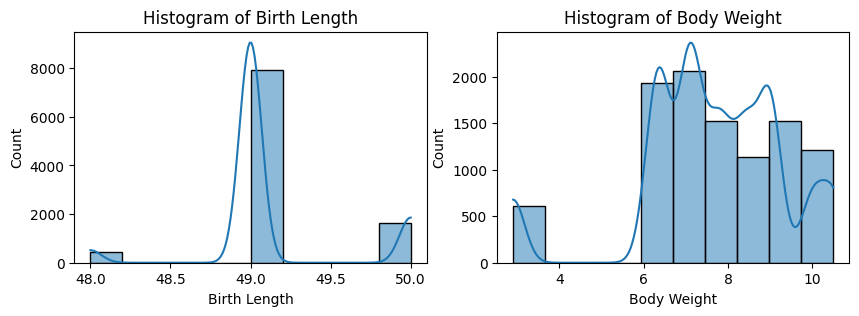

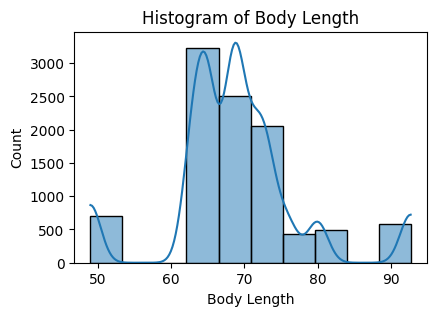

In [ ]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Histogram of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['Birth Weight'], bins=10, kde=True)
plt.title('Histogram of Birth Weight')

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(df['Birth Length'], bins=10, kde=True)
plt.title('Histogram of Birth Length')

plt.subplot(1, 2, 2)
sns.histplot(df['Body Weight'], bins=10, kde=True)
plt.title('Histogram of Body Weight')

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(df['Body Length'], bins=10, kde=True)
plt.title('Histogram of Body Length')

plt.show()

###Boxplot Variabel Numerik

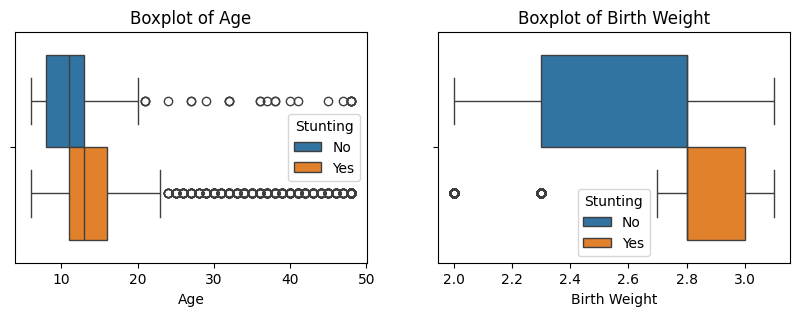

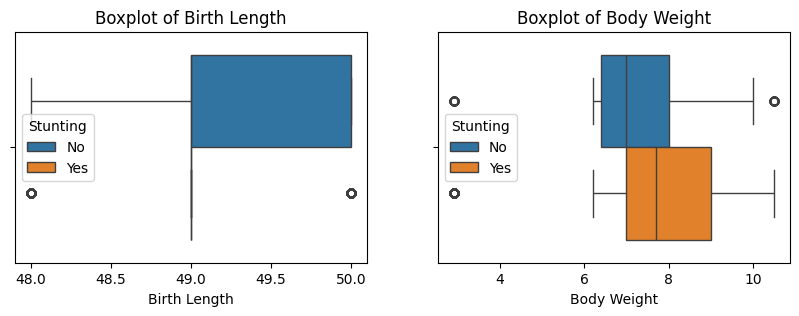

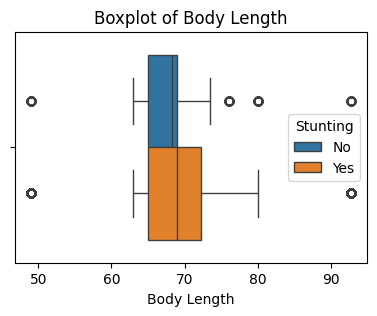

In [ ]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'],hue='Stunting',data = df)
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Birth Weight'],hue='Stunting',data = df)
plt.title('Boxplot of Birth Weight')

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Birth Length'],hue='Stunting',data = df)
plt.title('Boxplot of Birth Length')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Body Weight'],hue='Stunting',data = df)
plt.title('Boxplot of Body Weight')

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Body Length'],hue='Stunting',data = df)
plt.title('Boxplot of Body Length')

plt.show()

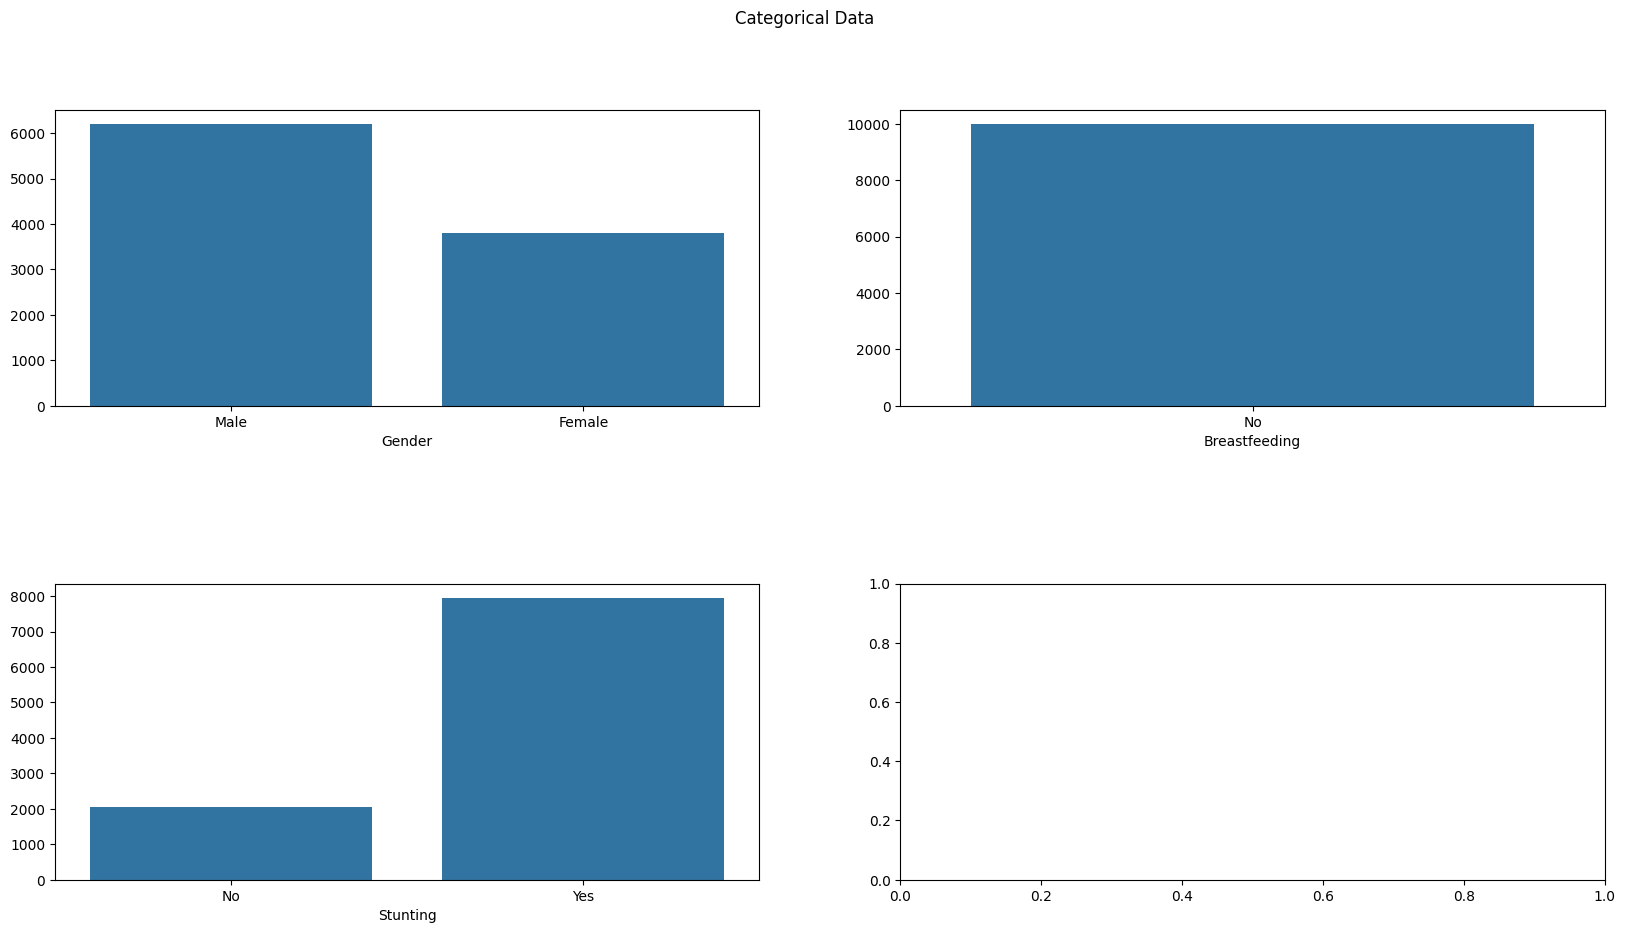

In [ ]:
#plot categorical Data (classification Task)
categorical = ['Gender','Breastfeeding', 'Stunting']
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle('Categorical Data')
row = 0
cols = 0
for item in categorical:
    sns.countplot(x=item, data=df, ax=axes[row, cols],dodge = False).set_ylabel("")
    cols += 1
    if cols == 2:
        cols = 0
        row += 1
        if row > 2 :
            break
plt.show()

**Visualisasi Data Kategorikal**
1. Gender: Berdasarkan grafik barchart di atas, dapat ditentukan bahwa responden berjenis kelamin laki-laki (male) memiliki jumlah yang lebih banyak dari responden perempuan (female).

2. Breastfeeding:  Berdasarkan grafik barchart di atas, dapat ditentukan bahwa responden tidak ada yang diberikan breast feeding atau asi eksklusif selama 6 bulan pertama.
3. Stunting: Berdasarkan grafik barchart di atas, dapat ditentukan bahwa responden responden yang mengalami stunting lebih banyak daridapa yang tidak stunting.


**Kesimpulan Eksplorasi**

Berdasarkan analisis yang telah dilakukan, berikut adalah kesimpulan dari eksplorasi :

-	Beberapa variabel memiliki distribusi yang kurang merata
- Beberapa variabel memiliki outlier, sehingga akan dilakukan tranformasi dengan feature engineering

### MISSING VALUE

In [ ]:
#Check missing value
df.isna().sum()

,0
Gender,0
Age,0
Birth Weight,0
Birth Length,0
Body Weight,0
Body Length,0
Breastfeeding,0
Stunting,0


Berdasarkan pemeriksaan missing values, tidak ditemukan kolom (variable) yang memiliki missing values.







### CHECKING INCONSISTENCIES


In [ ]:
for col in df.columns:
    print(f'{col} : {df[col].unique()}')

Gender : ['Male' 'Female']
Age : [17 11 16 31 15 35 10 13 44 18  7  8  9 14 47 12 21 41 42  6 32 40 48 19
 37 20 30 33 28 27 29 36 34 39 25 45 38 43 26 46 23 22 24]
Birth Weight : [3.  2.9 2.8 3.1 2.7 2.3 2. ]
Birth Length : [49 50 48]
Body Weight : [10.   2.9  8.5  6.4 10.5  8.   8.4  7.1  7.2  7.7  7.   9.   6.2]
Body Length : [72.2 65.  63.  49.  73.5 68.3 69.  92.7 80.  76.  71. ]
Breastfeeding : ['No']
Stunting : ['No' 'Yes']


Berdasarkan hasil pemeriksaan inconsistensies, tidak ditemukan nilai negatif atau nilai tidak wajar dari setiap kolom numerik atau kategorik.

### OUTLIERS

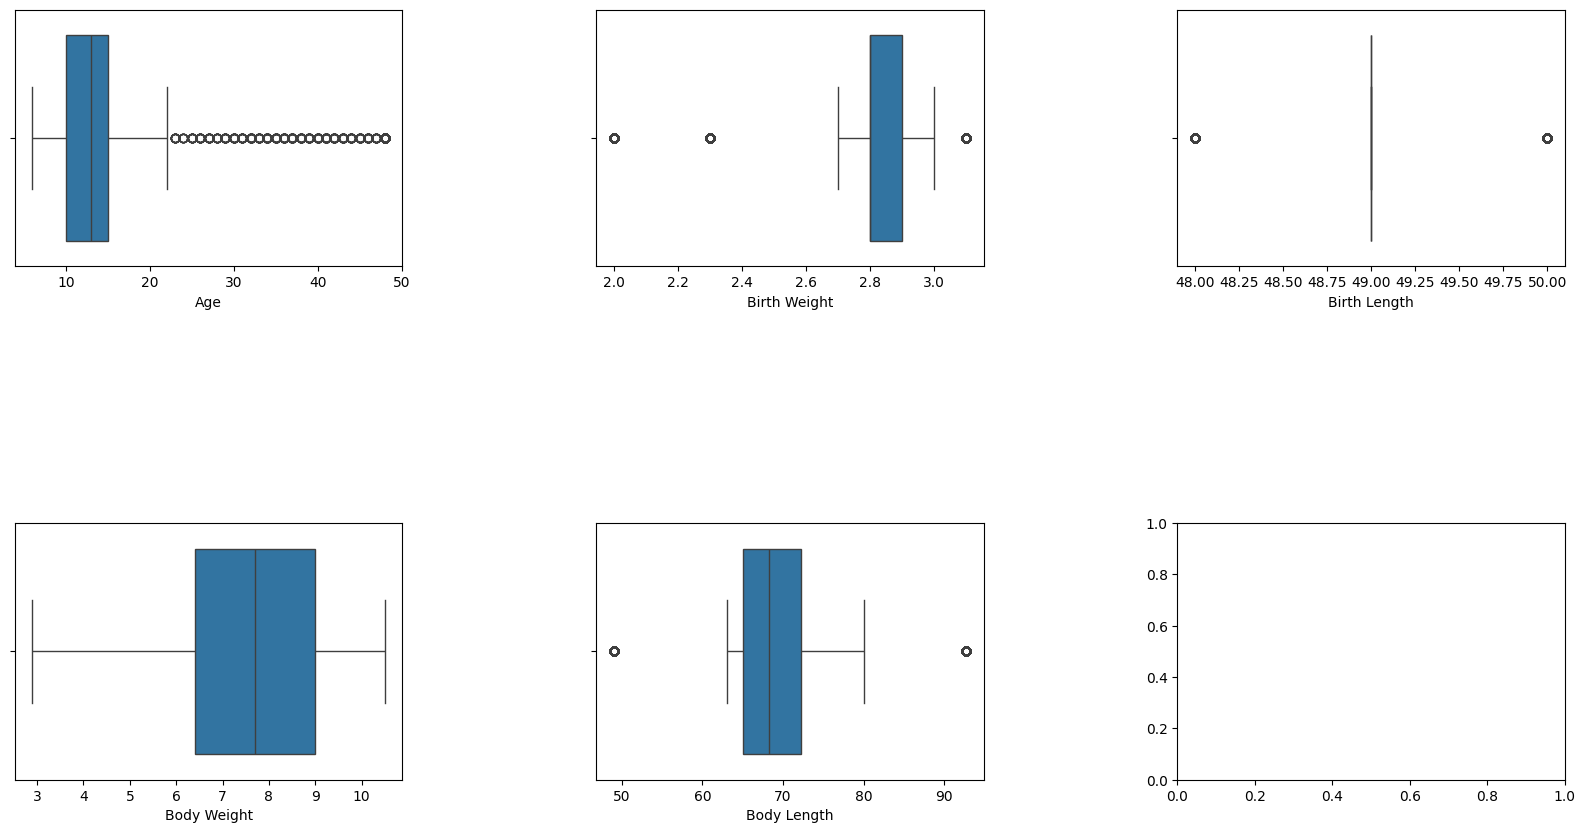

In [ ]:
#Checking outliers
numerical = df[['Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length']] # Changed to list of column names
fig, axes = plt.subplots(2,3,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.5)
row = 0
cols = 0
for item in numerical:
    if cols > 2:
        cols = 0
        row += 1
    ax = sns.boxplot(x=item,data=df,ax=axes[row, cols])
    ax.set_ylabel("")
    cols += 1


Berdasarkan analisis secara visual dengan metode boxplot dapat terlihat bahwa terdapat outlier pada data 'Age', 'Birth Weight', 'Birth Length', 'Body Length'

In [ ]:
#Mendeteksi outlier hour_df dengan metode IQR
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

#Mendeteksi outlier di hour_df
outliers_detected = detect_outliers(df, numerical)

#Menghitung jumlah outlier per kolom
outlier_counts = {col: len(outliers_detected[col]) for col in outliers_detected}

#Menampilkan jumlah outlier per kolom
print(outlier_counts)

{'Age': 754, 'Birth Weight': 2332, 'Birth Length': 2072, 'Body Weight': 0, 'Body Length': 1287}


Selanjutnya dilakukan pembersihan data dari outlier dengan menggunakan metode Winsorizing. Metode ini berfungsi untuk membatasi nilai ekstrem (outlier) pada data numerik agar tidak melebihi batas tertentu, dengan cara memotong nilai yang berada di luar lower bound dan upper bound ke batas tersebut, tanpa menghapus data. Implementasi Winsorizing pada data dilakukan dengan memotong outlier menggunakan rumus interquartile range (IQR).

In [ ]:
#remove outliers
def winsorizing_outlier(df_clean_fix,fitur):
  data_filtered = df.copy()
  for col in num_features:
    data = data_filtered[col]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data_filtered[col] = data_filtered[col].clip(lower_bound,upper_bound)

  return data_filtered

num_features = ['Age','Birth Weight','Birth Length', 'Body Weight', 'Body Length']
df_cleaned = winsorizing_outlier(df,num_features)

Dilakukan pendeteksian outlier kembali secara viusal dengan menggunakan boxplot.

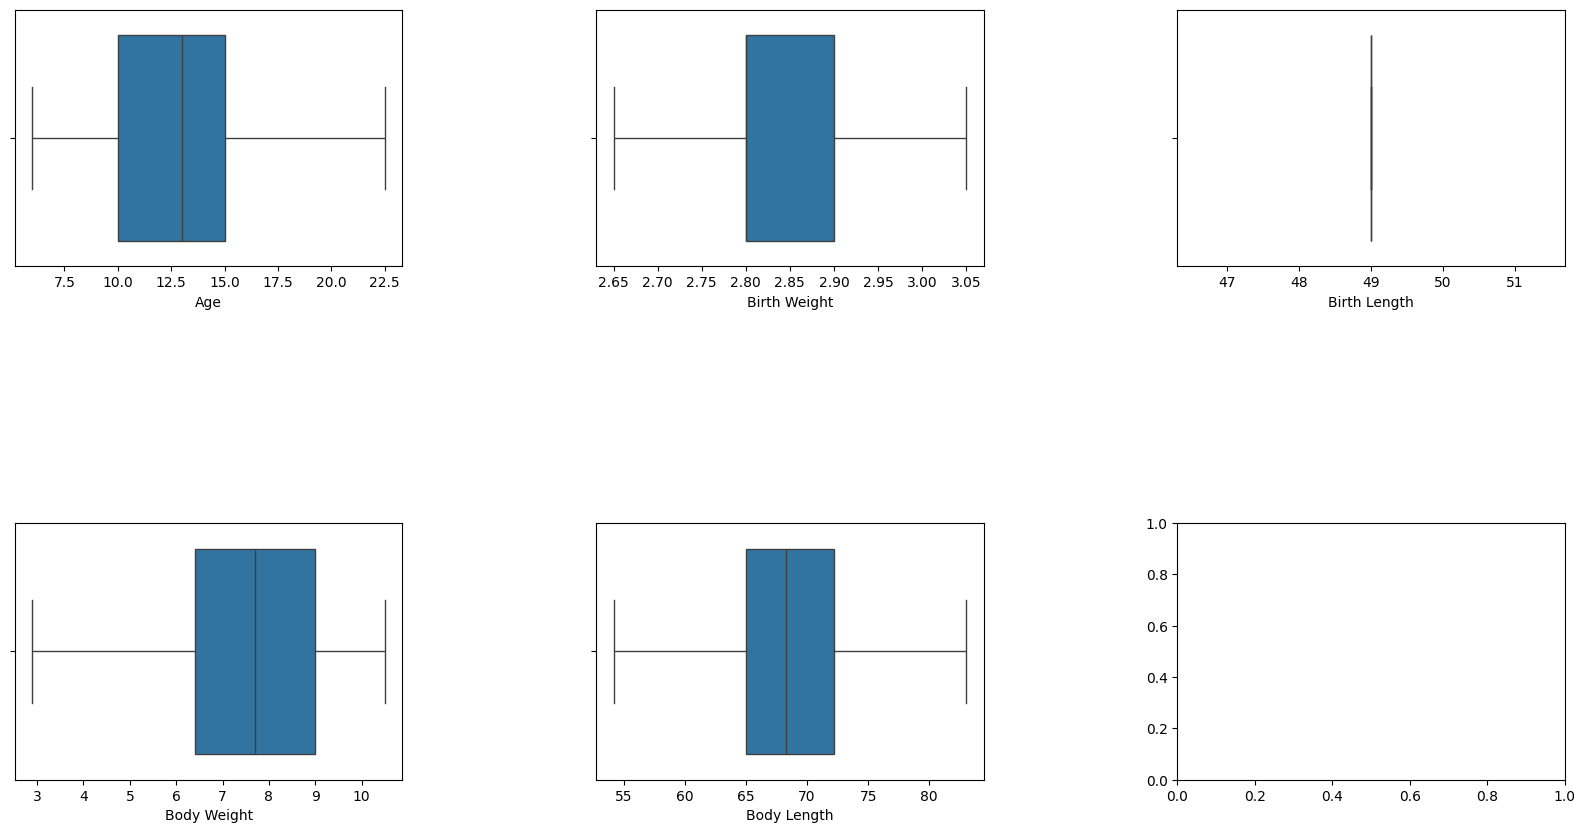

In [ ]:
fig, axes = plt.subplots(2,3,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.5)
row = 0
cols = 0

for item in numerical:
    if cols > 2:
        cols = 0
        row += 1
    ax = sns.boxplot(x=item,data=df_cleaned ,ax=axes[row, cols])
    ax.set_ylabel("")
    cols += 1

Setelah dilakukan pembersihan outlier dengan Winsorizing, berdasarkan analisis secara visual dengan metode boxplot dapat terlihat bahwa sudah tidak terdapat lagi outlier pada data 'Age', 'Birth Weight', 'Birth Length', 'Body Length'. Hal ini menunjukkan bahwa distribusi data telah berada dalam batas yang wajar dan tidak lagi memiliki nilai ekstrem yang dapat mengganggu analisis.

## FEATURE ENGINEERING

### Splitting Data

In [ ]:
X = df_cleaned.drop(columns = ['Stunting'])
y = df_cleaned['Stunting']

In [ ]:
X.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding
0,Male,17.0,3.00,49,10.0,72.2,No
1,Female,11.0,2.90,49,2.9,65.0,No
2,Male,16.0,2.90,49,8.5,72.2,No
3,Male,22.5,2.80,49,6.4,63.0,No
4,Male,15.0,3.05,49,10.5,54.2,No


In [ ]:
# Menyeleksi Fitur Kategorikal
categorical = X.select_dtypes(include=['object']).columns

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
X = pd.DataFrame(X)

for col in categorical:
    X[col] = label_encoder.fit_transform(X[col])

# Menampilkan hasil
X

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding
0,1,17.0,3.00,49,10.0,72.2,0
1,0,11.0,2.90,49,2.9,65.0,0
2,1,16.0,2.90,49,8.5,72.2,0
3,1,22.5,2.80,49,6.4,63.0,0
4,1,15.0,3.05,49,10.5,54.2,0
...,...,...,...,...,...,...,...
9995,1,15.0,3.00,49,9.0,63.0,0
9996,0,12.0,2.80,49,7.7,63.0,0
9997,1,16.0,2.80,49,7.7,54.2,0
9998,1,14.0,2.80,49,10.0,69.0,0


## STANDARD SCALER

In [ ]:
# Standarisasi dengan Standard Scaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding
0,0.782217,0.950809,1.275221,0.0,1.376450,0.528100,0.0
1,-1.278418,-0.486653,0.485121,0.0,-2.750558,-0.543733,0.0
2,0.782217,0.711232,0.485121,0.0,0.504547,0.528100,0.0
3,0.782217,2.268483,-0.304978,0.0,-0.716117,-0.841465,0.0
4,0.782217,0.471655,1.670270,0.0,1.667084,-2.151483,0.0


### Membagi data menjadi train dan test

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
print(X_train.shape)
print(X_test.shape)

(7500, 7)
(2500, 7)


## Membangun Model Klasifikasi

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

###SVM

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

###Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

###Evaluasi Model

In [ ]:
# Fungsi untuk mengukur kinerja model menggunakan data pelatihan
def evaluate_model_train(model, X_train, y_train):
    y_pred = model.predict(X_train)  # Memprediksi label berdasarkan data pelatihan
    cm = confusion_matrix(y_train, y_pred)  # Menghitung confusion matrix

    # Menyusun hasil evaluasi dalam bentuk dictionary
    results = {
        'Confusion Matrix': cm,  # Matriks kesalahan untuk melihat distribusi prediksi
        'Accuracy': accuracy_score(y_train, y_pred),  # Mengukur tingkat akurasi prediksi
        'Precision': precision_score(y_train, y_pred, average='macro'),  # Precision rata-rata
        'Recall': recall_score(y_train, y_pred, average='macro'),  # Recall rata-rata
        'F1-Score': f1_score(y_train, y_pred, average='macro')  # F1-score rata-rata
    }
    return results  # Mengembalikan hasil evaluasi model

In [ ]:
# Evaluasi model dan penyimpanan hasil
# Melakukan evaluasi pada setiap model yang telah dilatih dan menyimpan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model_train(knn, X_train, y_train),
    'Decision Tree (DT)': evaluate_model_train(dt, X_train, y_train),
    'Random Forest (RF)': evaluate_model_train(rf, X_train, y_train),
    'Support Vector Machine (SVM)': evaluate_model_train(svm, X_train, y_train),
    'Naive Bayes (NB)': evaluate_model_train(nb, X_train, y_train)
}

In [ ]:
# Membuat DataFrame ringkasan hasil evaluasi
# Membuat DataFrame untuk menyusun hasil evaluasi dalam bentuk tabel
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Mengisi DataFrame dengan hasil evaluasi model
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,  # Nama model
        'Accuracy': metrics['Accuracy'],  # Nilai akurasi
        'Precision': metrics['Precision'],  # Nilai precision
        'Recall': metrics['Recall'],  # Nilai recall
        'F1-Score': metrics['F1-Score']  # Nilai F1-score
    })

In [ ]:
# Mengubah list of dictionary menjadi DataFrame
summary_df = pd.DataFrame(rows)

# Menampilkan ringkasan hasil evaluasi
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),0.869467,0.828939,0.738245,0.769939
1,Decision Tree (DT),0.940800,0.899701,0.926875,0.912329
2,Random Forest (RF),0.940800,0.924741,0.889072,0.905398
3,Support Vector Machine (SVM),0.832000,0.805844,0.618358,0.643742
4,Naive Bayes (NB),0.828267,0.744722,0.665611,0.689687


###Confusion Matrix

####KNN

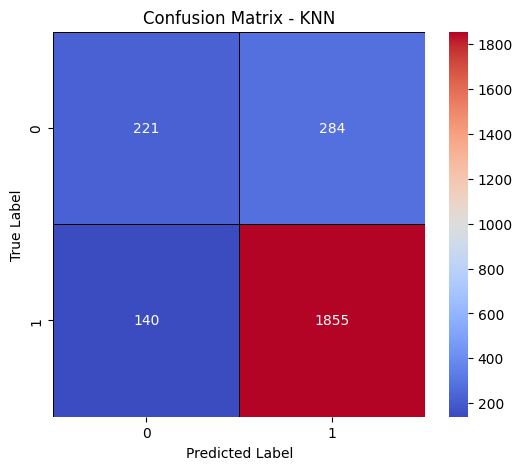

In [ ]:
# Melakukan prediksi pada data uji menggunakan model K-Nearest Neighbors (KNN)
y_pred = knn.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat plot confusion matrix dengan seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, linecolor='black')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')

# Menampilkan plot
plt.show()

####Decision Tree

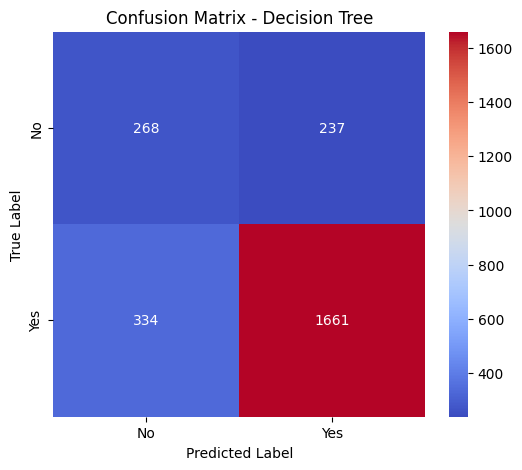

In [ ]:
# Melakukan prediksi menggunakan Decision Tree
y_pred = dt.predict(X_test)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

####Random Forest

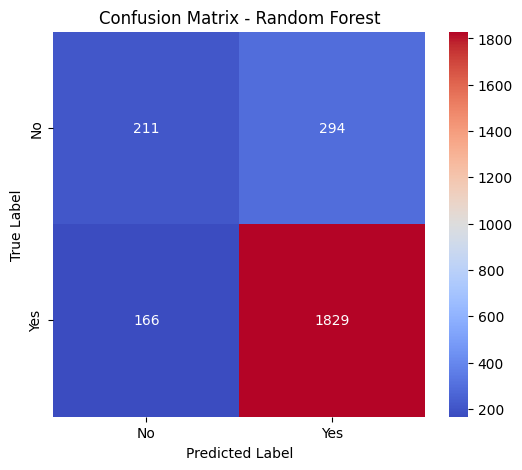

In [ ]:
# Melakukan prediksi menggunakan Random Forest
y_pred = rf.predict(X_test)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))

# Menambahkan label
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')

plt.show()

####SVM

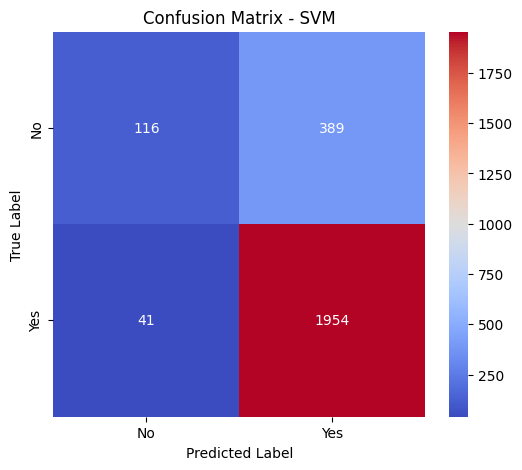

In [ ]:
# Melakukan prediksi menggunakan SVM
y_pred = svm.predict(X_test)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))

# Menambahkan label dan judul
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')

plt.show()

####Naive Bayes

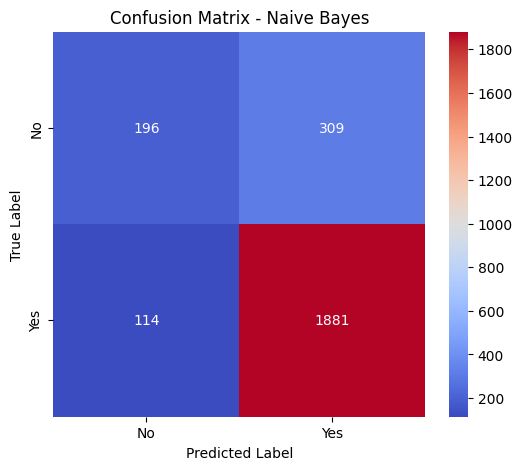

In [ ]:
# Melakukan prediksi menggunakan Naive Bayes
y_pred = nb.predict(X_test)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))

# Menambahkan label dan judul
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes')

plt.show()

###Check Overfitting

####KNN

In [ ]:
from sklearn.metrics import accuracy_score

# Prediksi di data latih
train_preds = knn.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)

# Prediksi di data uji
test_preds = knn.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.8694666666666667
Test Accuracy: 0.8304


####Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score

# Prediksi di data latih
train_preds = dt.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)

# Prediksi di data uji
test_preds = dt.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.9408
Test Accuracy: 0.7716


####Random Forest

In [ ]:
from sklearn.metrics import accuracy_score

# Prediksi di data latih
train_preds = rf.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)

# Prediksi di data uji
test_preds = rf.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.9408
Test Accuracy: 0.816


####SVM

In [ ]:
from sklearn.metrics import accuracy_score

# Prediksi di data latih
train_preds = svm.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)

# Prediksi di data uji
test_preds = svm.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.832
Test Accuracy: 0.828


####Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score

# Prediksi di data latih
train_preds = nb.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)

# Prediksi di data uji
test_preds = nb.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.8282666666666667
Test Accuracy: 0.8308


In [ ]:
#Save model
from google.colab import drive
drive.mount('/content/drive')

import os
os.makedirs('/content/drive/MyDrive/', exist_ok=True)
import pickle
pickle.dump(knn, open("/content/drive/MyDrive/KNN_Model.pkl", "wb"))
pickle.dump(dt, open("/content/drive/MyDrive/DT_Model.pkl", "wb"))
pickle.dump(rf, open("/content/drive/MyDrive/RF_Model.pkl", "wb"))
pickle.dump(svm, open("/content/drive/MyDrive/SVM_Model.pkl", "wb"))
pickle.dump(nb, open("/content/drive/MyDrive/NB_Model.pkl", "wb"))

Mounted at /content/drive


In [ ]:
# prompt: buatkan dataset untuk mencoba prediksi dengan model di atas yang sudah disimpan

import pandas as pd
import numpy as np

# Load the trained model (replace with your actual model loading)
import pickle
loaded_model = pickle.load(open("/content/drive/MyDrive/KNN_Model.pkl", "rb")) #Example using KNN


# Create a sample dataset for prediction
new_data = pd.DataFrame({
    'Gender': ['1'],  # Replace with your actual data
    'Age': [24],  # Replace with your actual data
    'Birth Weight': [3.2], # Replace with your actual data
    'Birth Length': [48],  # Replace with your actual data
    'Body Weight': [15], # Replace with your actual data
    'Body Length': [80],  # Replace with your actual data
    'Breastfeeding': ['1']  # Replace with your actual data
})


# Make predictions
predictions = loaded_model.predict(new_data)
print("Predictions:", predictions)


Predictions: ['Yes']


## Kesimpulan

1. Random Forest (RF)
Random Forest menunjukkan performa yang sangat baik dan seimbang di seluruh metrik evaluasi, dengan akurasi sebesar 94.08%, precision 92.47%, recall 88.91%, dan F1-score 90.54%. Model ini unggul dalam hal presisi, menjadikannya pilihan tepat untuk kasus di mana kesalahan prediksi positif (false positive) perlu diminimalkan. Random Forest juga menunjukkan stabilitas yang tinggi dan cocok untuk digunakan dalam lingkungan produksi.

2. Decision Tree (DT)
Decision Tree juga menunjukkan performa yang sangat kompetitif dengan Random Forest, mencatat akurasi 94.08%, precision 89.97%, recall 92.69%, dan F1-score 91.23%. Model ini memiliki nilai recall tertinggi di antara semua model, menjadikannya sangat andal dalam mendeteksi kasus positif. Selain itu, struktur model yang mudah diinterpretasi memberikan nilai tambah dalam konteks transparansi dan explainability.

3. K-Nearest Neighbors (KNN)
Model KNN mencatat akurasi 86.95%, dengan precision 82.89%, recall 73.82%, dan F1-score 76.99%. Meskipun lebih rendah dibanding DT dan RF, model ini tetap menunjukkan performa yang layak. Namun, recall yang relatif rendah menunjukkan bahwa model masih cenderung meleset dalam mengidentifikasi kelas positif. Model ini dapat dipertimbangkan untuk kasus dengan kebutuhan komputasi ringan dan data berukuran kecil.

4. Support Vector Machine (SVM)
SVM mencatat akurasi 83.20%, precision 80.58%, recall 61.84%, dan F1-score 64.37%. Performa recall yang rendah menunjukkan keterbatasan model dalam mendeteksi kelas positif, yang dapat menjadi kendala pada masalah klasifikasi yang sensitif terhadap kesalahan tipe II (false negatives).

5. Naive Bayes (NB)
Naive Bayes merupakan model dengan performa paling rendah di antara lima model yang diuji, dengan akurasi 82.83%, precision 74.47%, recall 66.56%, dan F1-score 68.97%. Meskipun ringan dan cepat, model ini kurang mampu menangkap kompleksitas data secara optimal, sehingga kurang direkomendasikan sebagai model utama dalam skenario ini.

Rekomendasi

Berdasarkan hasil evaluasi, Random Forest dan Decision Tree merupakan model yang paling optimal, dengan performa tinggi dan seimbang di semua metrik. Keduanya sangat direkomendasikan untuk digunakan lebih lanjut, baik dalam proses deployment maupun pengambilan keputusan. Jika diperlukan interpretasi model yang lebih transparan, Decision Tree dapat menjadi pilihan utama. Sebaliknya, jika stabilitas dan akurasi menjadi prioritas, maka Random Forest adalah opsi terbaik.